# İTÜSEM BANKA MEVDUATI PAZARLAMA PROJESİ

In [93]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, confusion_matrix ,ConfusionMatrixDisplay
from sklearn.model_selection import cross_val_score
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression

from xgboost import XGBClassifier

from scipy.stats import shapiro

## 1 - Veri Seti Tanımı
- Vadeli Mevduat : Anında nakit paraya dönüştürülemeyen, bankadan çekilmesi için belirli bir zamanın (vade) dolması gerektiği, bu süre dolunca ise faiz getirisiyle birlikte çekilebilen ya da başka bir vadeye yatırılan hesap türüdür. Vade uzadıkça faiz getirisi artar.
https://tr.wikipedia.org/wiki/Vadeli_mevduat
- Banka vadeli mevduat hesabı pazarlama verileri  https://archive.ics.uci.edu/dataset/222/bank+marketing adresinden temin edilmiştir. Vadeli mevduata katılımı hedefleyen bir pazarlama analizi için ele alınan verilerin değişkenleri:
### Kampanya Değişkenleri
1. age : yaş (numeric)
2. job : meslek türü (categorical: "admin.","unknown","unemployed","management","housemaid","entrepreneur","student",
                                       "blue-collar","self-employed","retired","technician","services") 
3. marital : medeni durumu (categorical: "married","divorced","single"; note: "divorced" means divorced or widowed)
4. education: eğitim durumu (categorical: "unknown","secondary","primary","tertiary")
5. default: temerrüdü var mı ? (binary: "yes","no")
6. balance: ortalama bakiye (numeric) 
7. housing: konut kredisi var mı ? (binary: "yes","no")
8. loan: kişisel kredisi var mı ?  (binary: "yes","no")
### Son iletişim ile ilgili değişkenler:
9. contact: iletişim türü (categorical: "unknown","telephone","cellular") 
10. day: en son iletişime geçile ayın hangi günün olduğu (numeric)
11. month: en son iletişime geçile ay (categorical: "jan", "feb", "mar", ..., "nov", "dec")
12. duration: saniye olarak son temas süresi (numeric)
### Diğer değişkenler:
13. campaign: iletişimi gerçekleştiren kişi numarası (numeric, includes last contact)
14. pdays: Önceki bir kampanyadan müşteriyle en son iletişime geçilmesinden sonra geçen gün sayısı (numeric, -1 means client was not previously contacted)
15. previous: müşteriyle önceki kampanyalarda gerçekleştirilen iletişim sayısını ifade eder (numeric)
16. poutcome: Önceki pazarlama kampanyasının sonucu (categorical: "unknown","other","failure","success")
### Hedef değişken:
17. y: Vadeli Mevduata sağlandı mı ? (binary: "yes","no")
- Alıntı : [Moro ve diğerleri, 2011] S. Moro, R. Laureano ve P. Cortez. Bankanın Doğrudan Pazarlamasında Veri Madenciliği Kullanımı: CRISP-DM Metodolojisinin Bir Uygulaması.
   P. Novais ve ark. (Eds.), Avrupa Simülasyon ve Modelleme Konferansı Bildirileri - ESM'2011, s. 117-121, Guimarão, Portekiz, Ekim, 2011. EUROSIS.

   Şu adreste mevcuttur: [pdf] http://hdl.handle.net/1822/14838
                 [önlük] http://www3.dsi.uminho.pt/pcortez/bib/2011-esm-

In [94]:
df = pd.read_csv("/Users/hakanbayram/Desktop/bank+marketing/bank/bank-full.csv",sep=";")

Değişkenlerin ";" ile birbirinden ayrıldığı veri setini "sep" paremetresi ile kolonlara ayırıyoruz.

In [95]:
df.head(10)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
5,35,management,married,tertiary,no,231,yes,no,unknown,5,may,139,1,-1,0,unknown,no
6,28,management,single,tertiary,no,447,yes,yes,unknown,5,may,217,1,-1,0,unknown,no
7,42,entrepreneur,divorced,tertiary,yes,2,yes,no,unknown,5,may,380,1,-1,0,unknown,no
8,58,retired,married,primary,no,121,yes,no,unknown,5,may,50,1,-1,0,unknown,no
9,43,technician,single,secondary,no,593,yes,no,unknown,5,may,55,1,-1,0,unknown,no


In [96]:
data = df.copy()

In [97]:
data.shape

(45211, 17)

In [98]:
data.nunique()

age            77
job            12
marital         3
education       4
default         2
balance      7168
housing         2
loan            2
contact         3
day            31
month          12
duration     1573
campaign       48
pdays         559
previous       41
poutcome        4
y               2
dtype: int64

Değişkenlerden her biri en az iki farklı değere sahiptir.

In [99]:
data.dtypes

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
y            object
dtype: object

In [100]:
data.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

Örneklerde girilmemiş değer yoktur.

In [101]:
data.describe().T # Sayısal değişkenlerin temel istatistiksel değerleri.

,count,mean,std,min,25%,50%,75%,max
age,45211.0,40.936210,10.618762,18.0,33.0,39.0,48.0,95.0
balance,45211.0,1362.272058,3044.765829,-8019.0,72.0,448.0,1428.0,102127.0
day,45211.0,15.806419,8.322476,1.0,8.0,16.0,21.0,31.0
duration,45211.0,258.163080,257.527812,0.0,103.0,180.0,319.0,4918.0
campaign,45211.0,2.763841,3.098021,1.0,1.0,2.0,3.0,63.0
pdays,45211.0,40.197828,100.128746,-1.0,-1.0,-1.0,-1.0,871.0
previous,45211.0,0.580323,2.303441,0.0,0.0,0.0,0.0,275.0


In [102]:
# object olan değişkenleri category olarak değiştirmek için bir for döngüsü kullanıyoruz.
for col in ['job', 'marital', 'education', 'default',"contact","housing","loan","month","y","poutcome",]:
    data[col] = data[col].astype('category')

In [103]:
data.info() # Veriler ile ilgili temel bilgiler.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   age        45211 non-null  int64   
 1   job        45211 non-null  category
 2   marital    45211 non-null  category
 3   education  45211 non-null  category
 4   default    45211 non-null  category
 5   balance    45211 non-null  int64   
 6   housing    45211 non-null  category
 7   loan       45211 non-null  category
 8   contact    45211 non-null  category
 9   day        45211 non-null  int64   
 10  month      45211 non-null  category
 11  duration   45211 non-null  int64   
 12  campaign   45211 non-null  int64   
 13  pdays      45211 non-null  int64   
 14  previous   45211 non-null  int64   
 15  poutcome   45211 non-null  category
 16  y          45211 non-null  category
dtypes: category(10), int64(7)
memory usage: 2.8 MB


In [104]:
# Her bir kategorik değişkenin aldığı niteliksel değerler.
for column in data.columns:
    if data[column].dtype == 'category':  
        unique_values = data[column].unique()
        print(f"Kategorik Unique değerler - {column}: {unique_values} ")

Kategorik Unique değerler - job: ['management', 'technician', 'entrepreneur', 'blue-collar', 'unknown', ..., 'services', 'self-employed', 'unemployed', 'housemaid', 'student']
Length: 12
Categories (12, object): ['admin.', 'blue-collar', 'entrepreneur', 'housemaid', ..., 'student', 'technician', 'unemployed', 'unknown'] 
Kategorik Unique değerler - marital: ['married', 'single', 'divorced']
Categories (3, object): ['divorced', 'married', 'single'] 
Kategorik Unique değerler - education: ['tertiary', 'secondary', 'unknown', 'primary']
Categories (4, object): ['primary', 'secondary', 'tertiary', 'unknown'] 
Kategorik Unique değerler - default: ['no', 'yes']
Categories (2, object): ['no', 'yes'] 
Kategorik Unique değerler - housing: ['yes', 'no']
Categories (2, object): ['no', 'yes'] 
Kategorik Unique değerler - loan: ['no', 'yes']
Categories (2, object): ['no', 'yes'] 
Kategorik Unique değerler - contact: ['unknown', 'cellular', 'telephone']
Categories (3, object): ['cellular', 'telephon

In [105]:
# Kategorik değişkenleri bir sınıfa atıyoruz.
cat_feature=[feature for feature in data.columns if ((data[feature].dtypes=='category'))]
cat_feature

['job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'poutcome',
 'y']

In [106]:
# Sayısal değişkenleri bir sınıfa atıyoruz.
num_featuer=[feature for feature in data.columns if ((data[feature].dtypes=="int64"))]
num_featuer

['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']

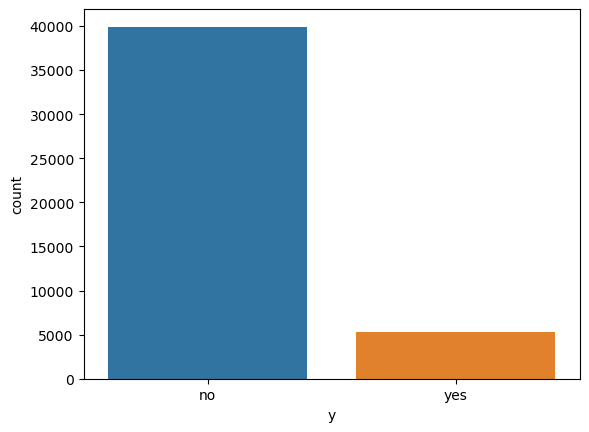

In [107]:
sns.countplot(x='y',data=data)
plt.show()

Kampanya verilerine göre katılım sağlayanların sağlamayanlara görece az olduğunu görmekteyiz.

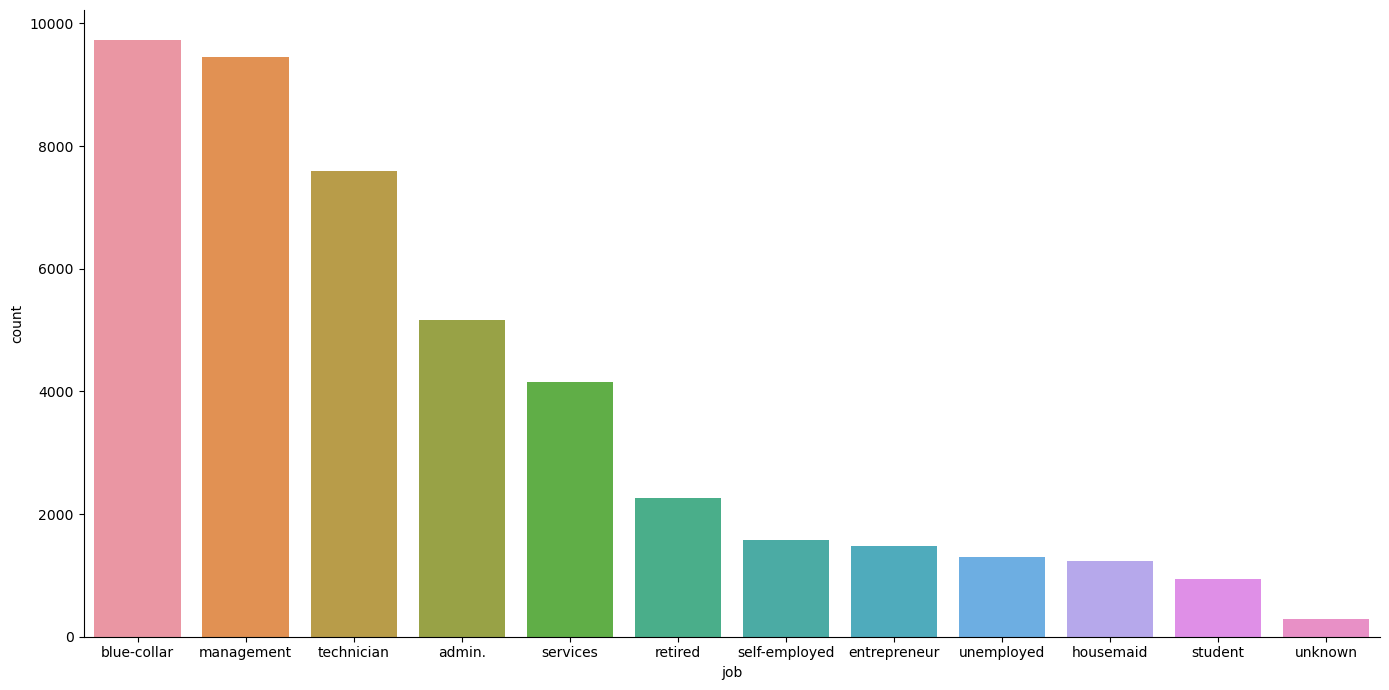

In [108]:
job_counts = df['job'].value_counts()
ordered_jobs = job_counts.index
sns.catplot(data=df, x="job", kind="count",height=7, aspect=2,  order=ordered_jobs)

Text(0.5, 1.0, 'mesleklerin katılımları')

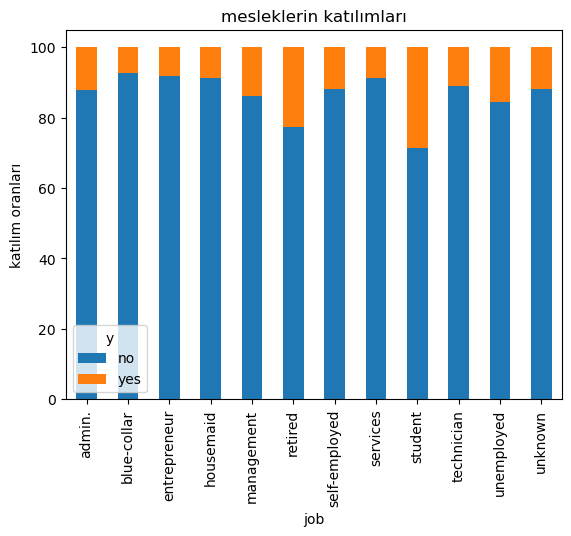

In [109]:
diff_categ_count=df['job'].value_counts()
group_table=df.groupby(['job','y']).size().astype(float)
for categ in group_table.index.levels[0]:
    for income in group_table[categ].index:
        group_table[categ][income]=group_table[categ][income]/diff_categ_count[categ]*100
group_table.unstack().plot(kind='bar',stacked=True)
plt.ylabel('katılım oranları')
plt.title('mesleklerin katılımları')

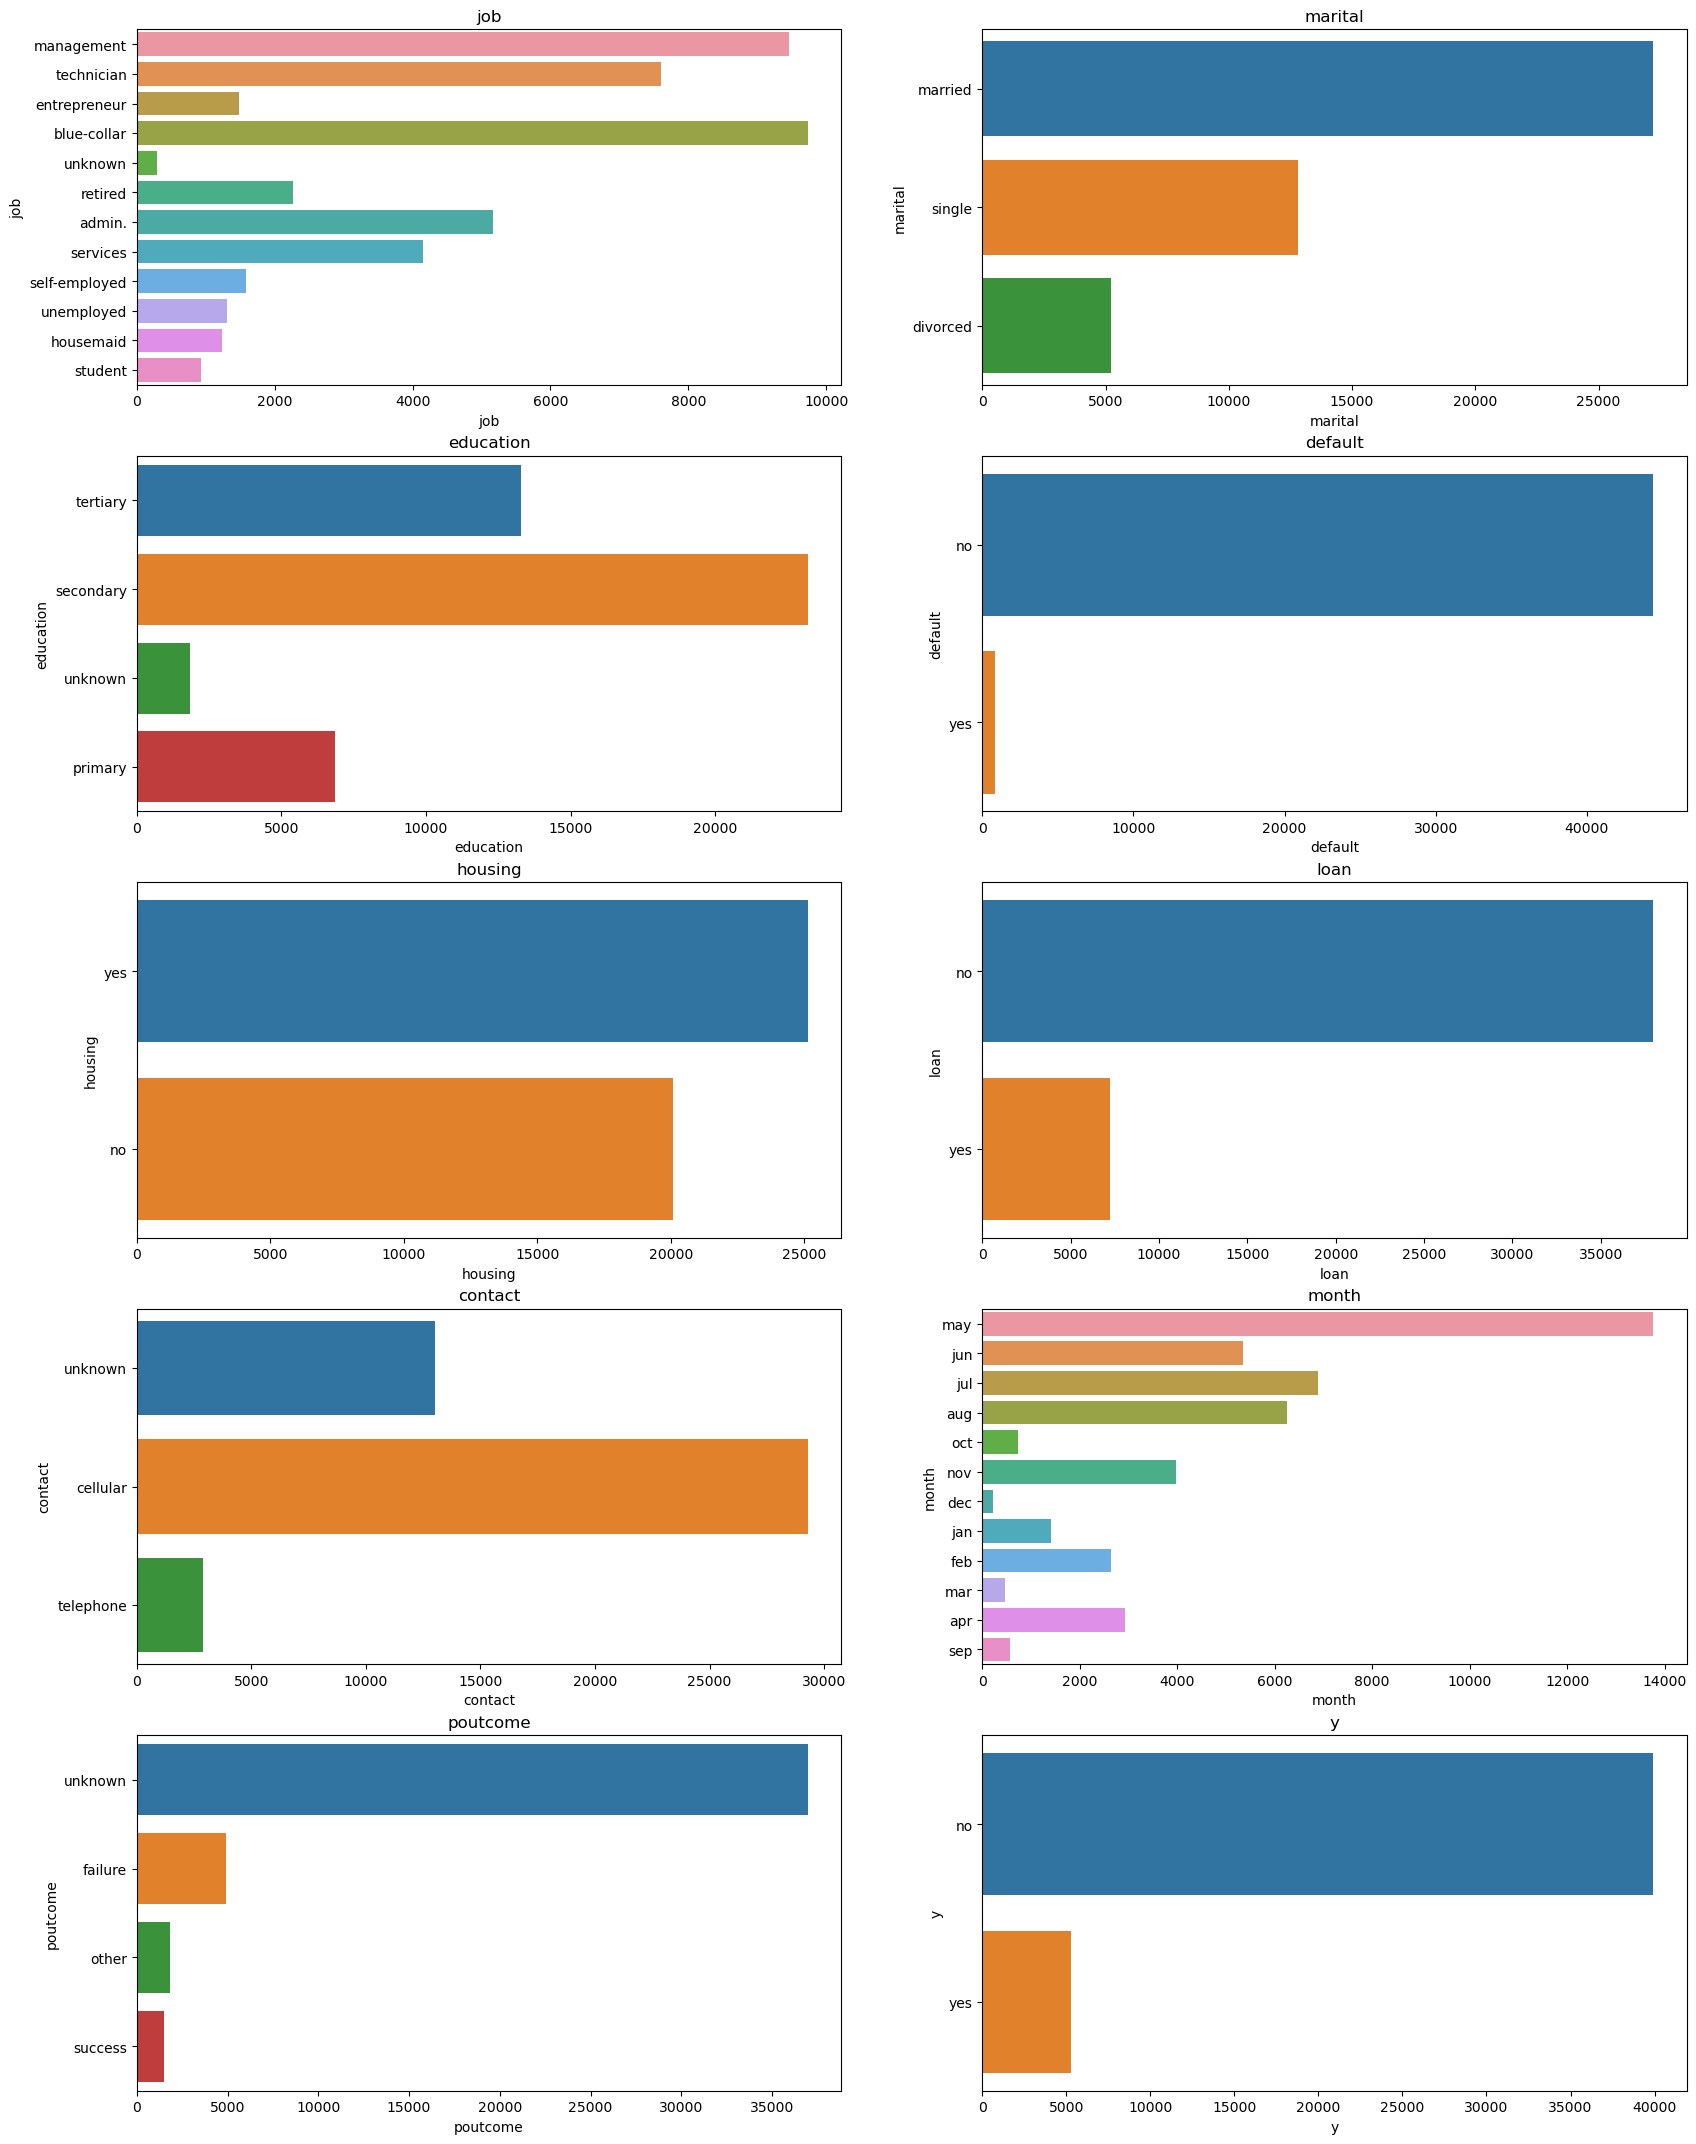

In [110]:
plt.figure(figsize=(20,60), facecolor='white')
plotnumber =1
for categorical_feature in cat_feature:
    ax = plt.subplot(11,2,plotnumber)
    sns.countplot(y=categorical_feature,data=df)
    plt.xlabel(categorical_feature)
    plt.title(categorical_feature)
    plotnumber+=1
plt.show()

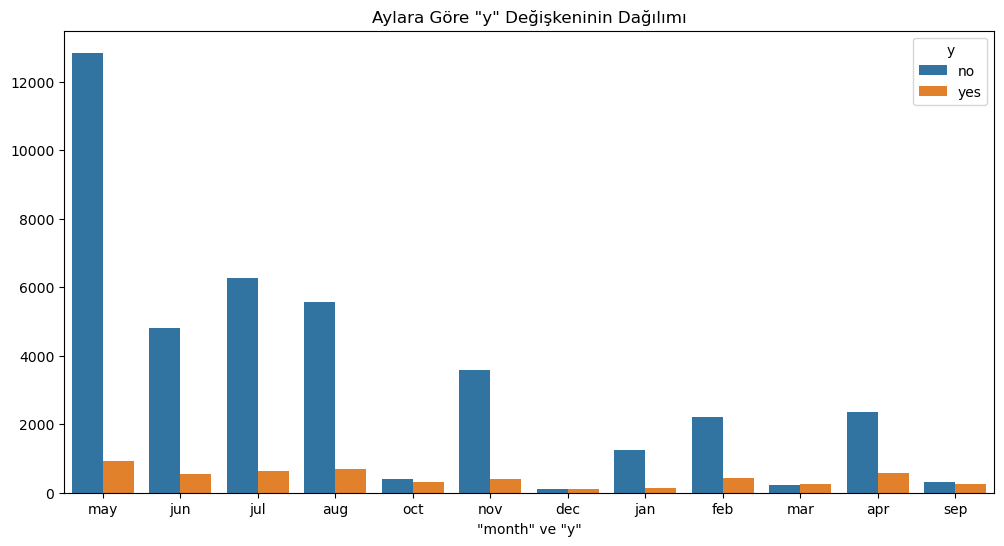

In [111]:
plt.figure(figsize=(12, 6))
sns.countplot(x='month', hue='y', data=df)
plt.xlabel('"month" ve "y"')
plt.ylabel('')
plt.title('Aylara Göre "y" Değişkeninin Dağılımı')
plt.show()

/var/folders/18/vv70kmgd4938g18f9q1d7qx80000gn/T/ipykernel_10248/2370204036.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[continuous_feature])
/var/folders/18/vv70kmgd4938g18f9q1d7qx80000gn/T/ipykernel_10248/2370204036.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[continuous_fe

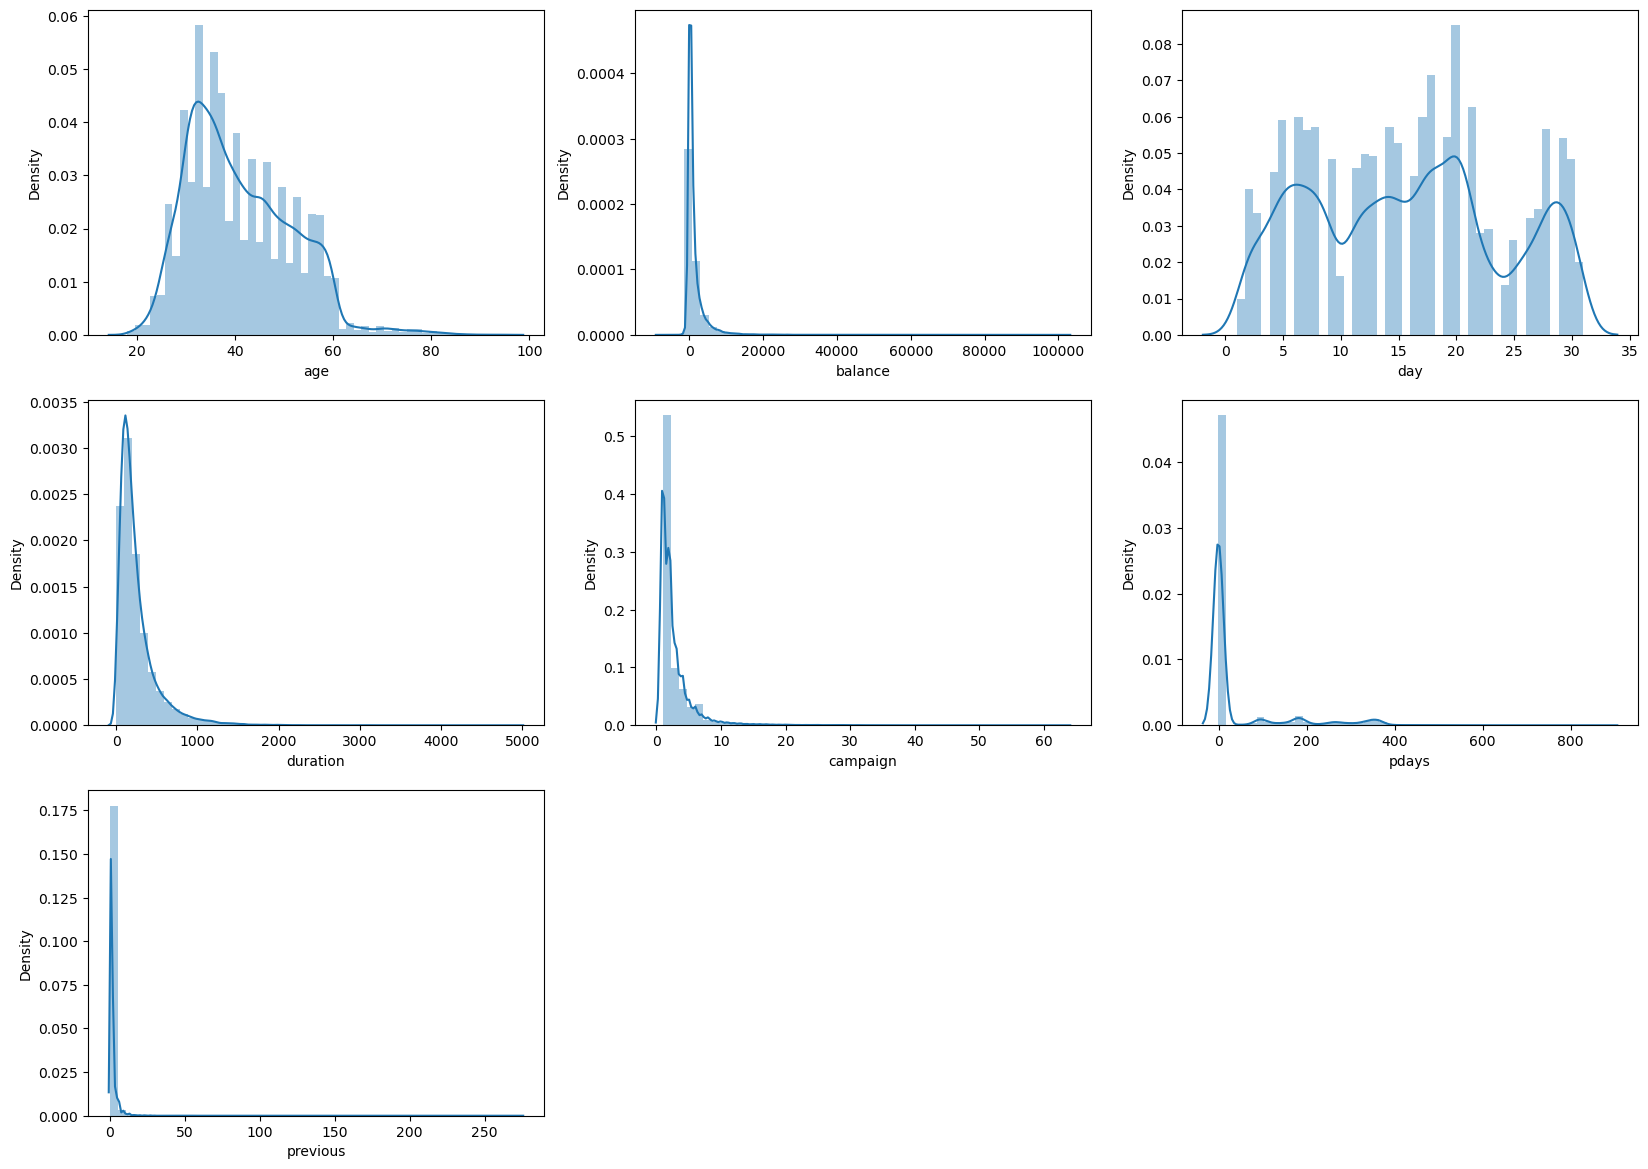

In [112]:
plt.figure(figsize=(20,60), facecolor='white')
plotnumber =1
for continuous_feature in num_featuer:
    ax = plt.subplot(12,3,plotnumber)
    sns.distplot(df[continuous_feature])
    plt.xlabel(continuous_feature)
    plotnumber+=1
plt.show()

### "age" değişkeni için normal dağılım testi 

In [114]:
stat, p_value = shapiro(df["age"])
print(f'age: p-value={p_value}')
if p_value < 0.05:
    print('"age" normal dağılıma sahip değildir.')
else:
    print('"age" normal dağılıma sahiptir.')

age: p-value=0.0
"age" normal dağılıma sahip değildir.


/Users/hakanbayram/anaconda3/lib/python3.11/site-packages/scipy/stats/_morestats.py:1816: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


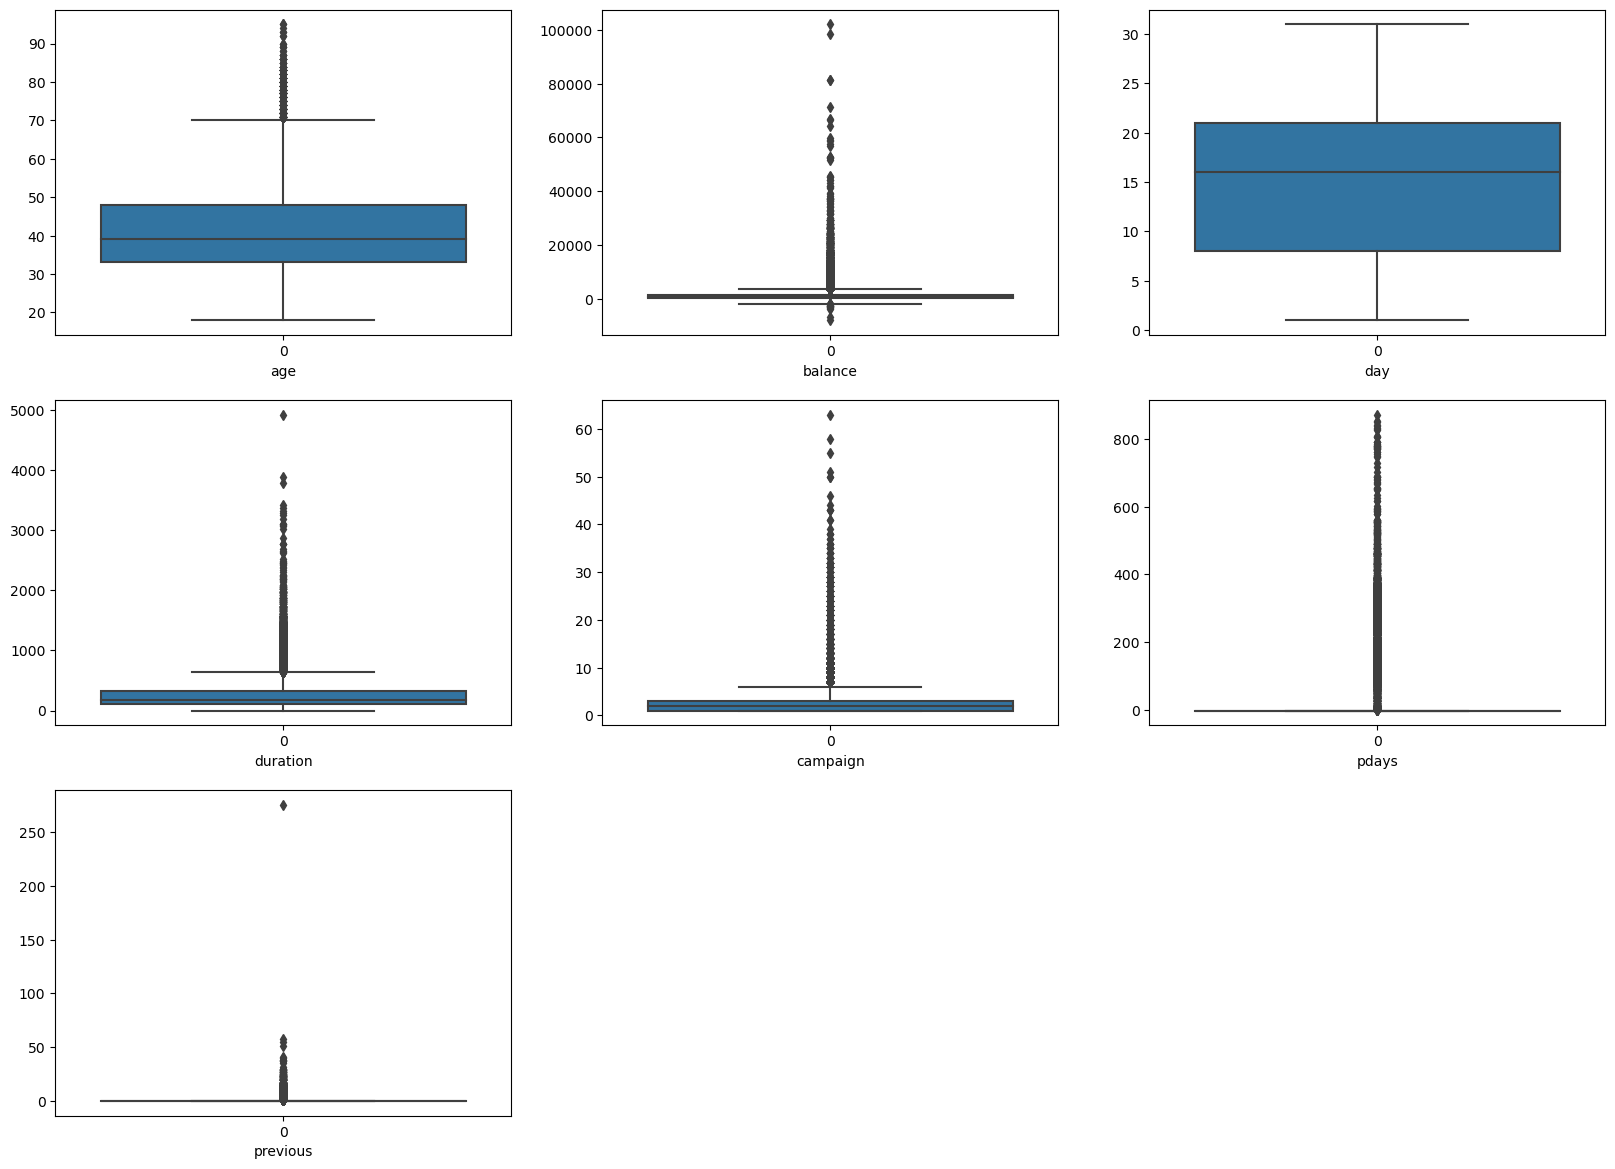

In [115]:
#outlier olan değerleri görüntülüyoruz.
plt.figure(figsize=(20,60), facecolor='white')
plotnumber =1
for numerical_feature in num_featuer:
    ax = plt.subplot(12,3,plotnumber)
    sns.boxplot(df[numerical_feature])
    plt.xlabel(numerical_feature)
    plotnumber+=1
plt.show()

- day değişkeni outlier değer barındırmamaktadır.
- diğer değişkenler outlier değerler içermektedir.

/var/folders/18/vv70kmgd4938g18f9q1d7qx80000gn/T/ipykernel_10248/327766937.py:7: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  cor = dfcor.corr()


<Axes: >

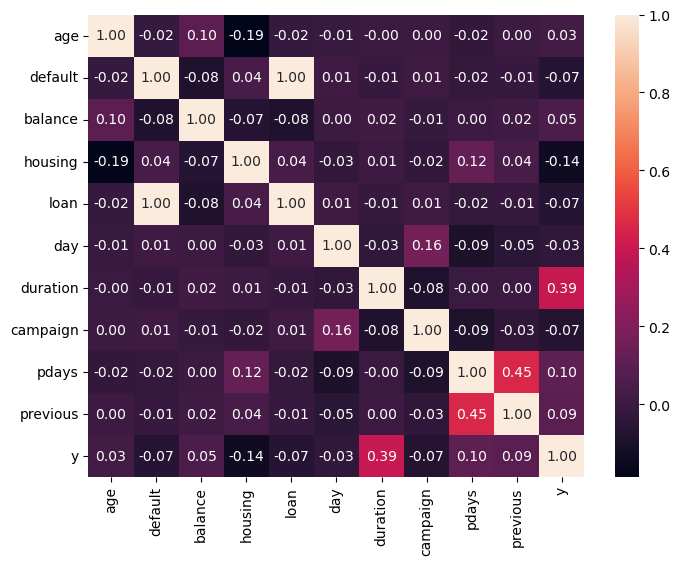

In [116]:
# Sayısal olan değişkenler ve 2 niteliten oluşan kategorik değişkenlerin korelasyonlarına bakıyoruz.
dfcor = df.copy()
dfcor['y'] = dfcor['y'].replace({'yes': 1, 'no': 0})
dfcor['housing'] = dfcor['housing'].replace({'yes': 1, 'no': 0})
dfcor['loan'] = dfcor['loan'].replace({'yes': 1, 'no': 0})
dfcor['default'] = dfcor['loan'].replace({'yes': 1, 'no': 0})
cor = dfcor.corr()
fig= plt.figure(figsize= (8,6))
sns.heatmap(cor, annot=True, fmt = ".2f")

- Son temasta geçirilen süre ile kampanyaya katılımın arasında yüksek olmasada bir ilişkinin olabildiği gözükmektedir.
- Ev kredisi olanlar ile ilişki yönü açısından ters bir durumu gözükmektedir.

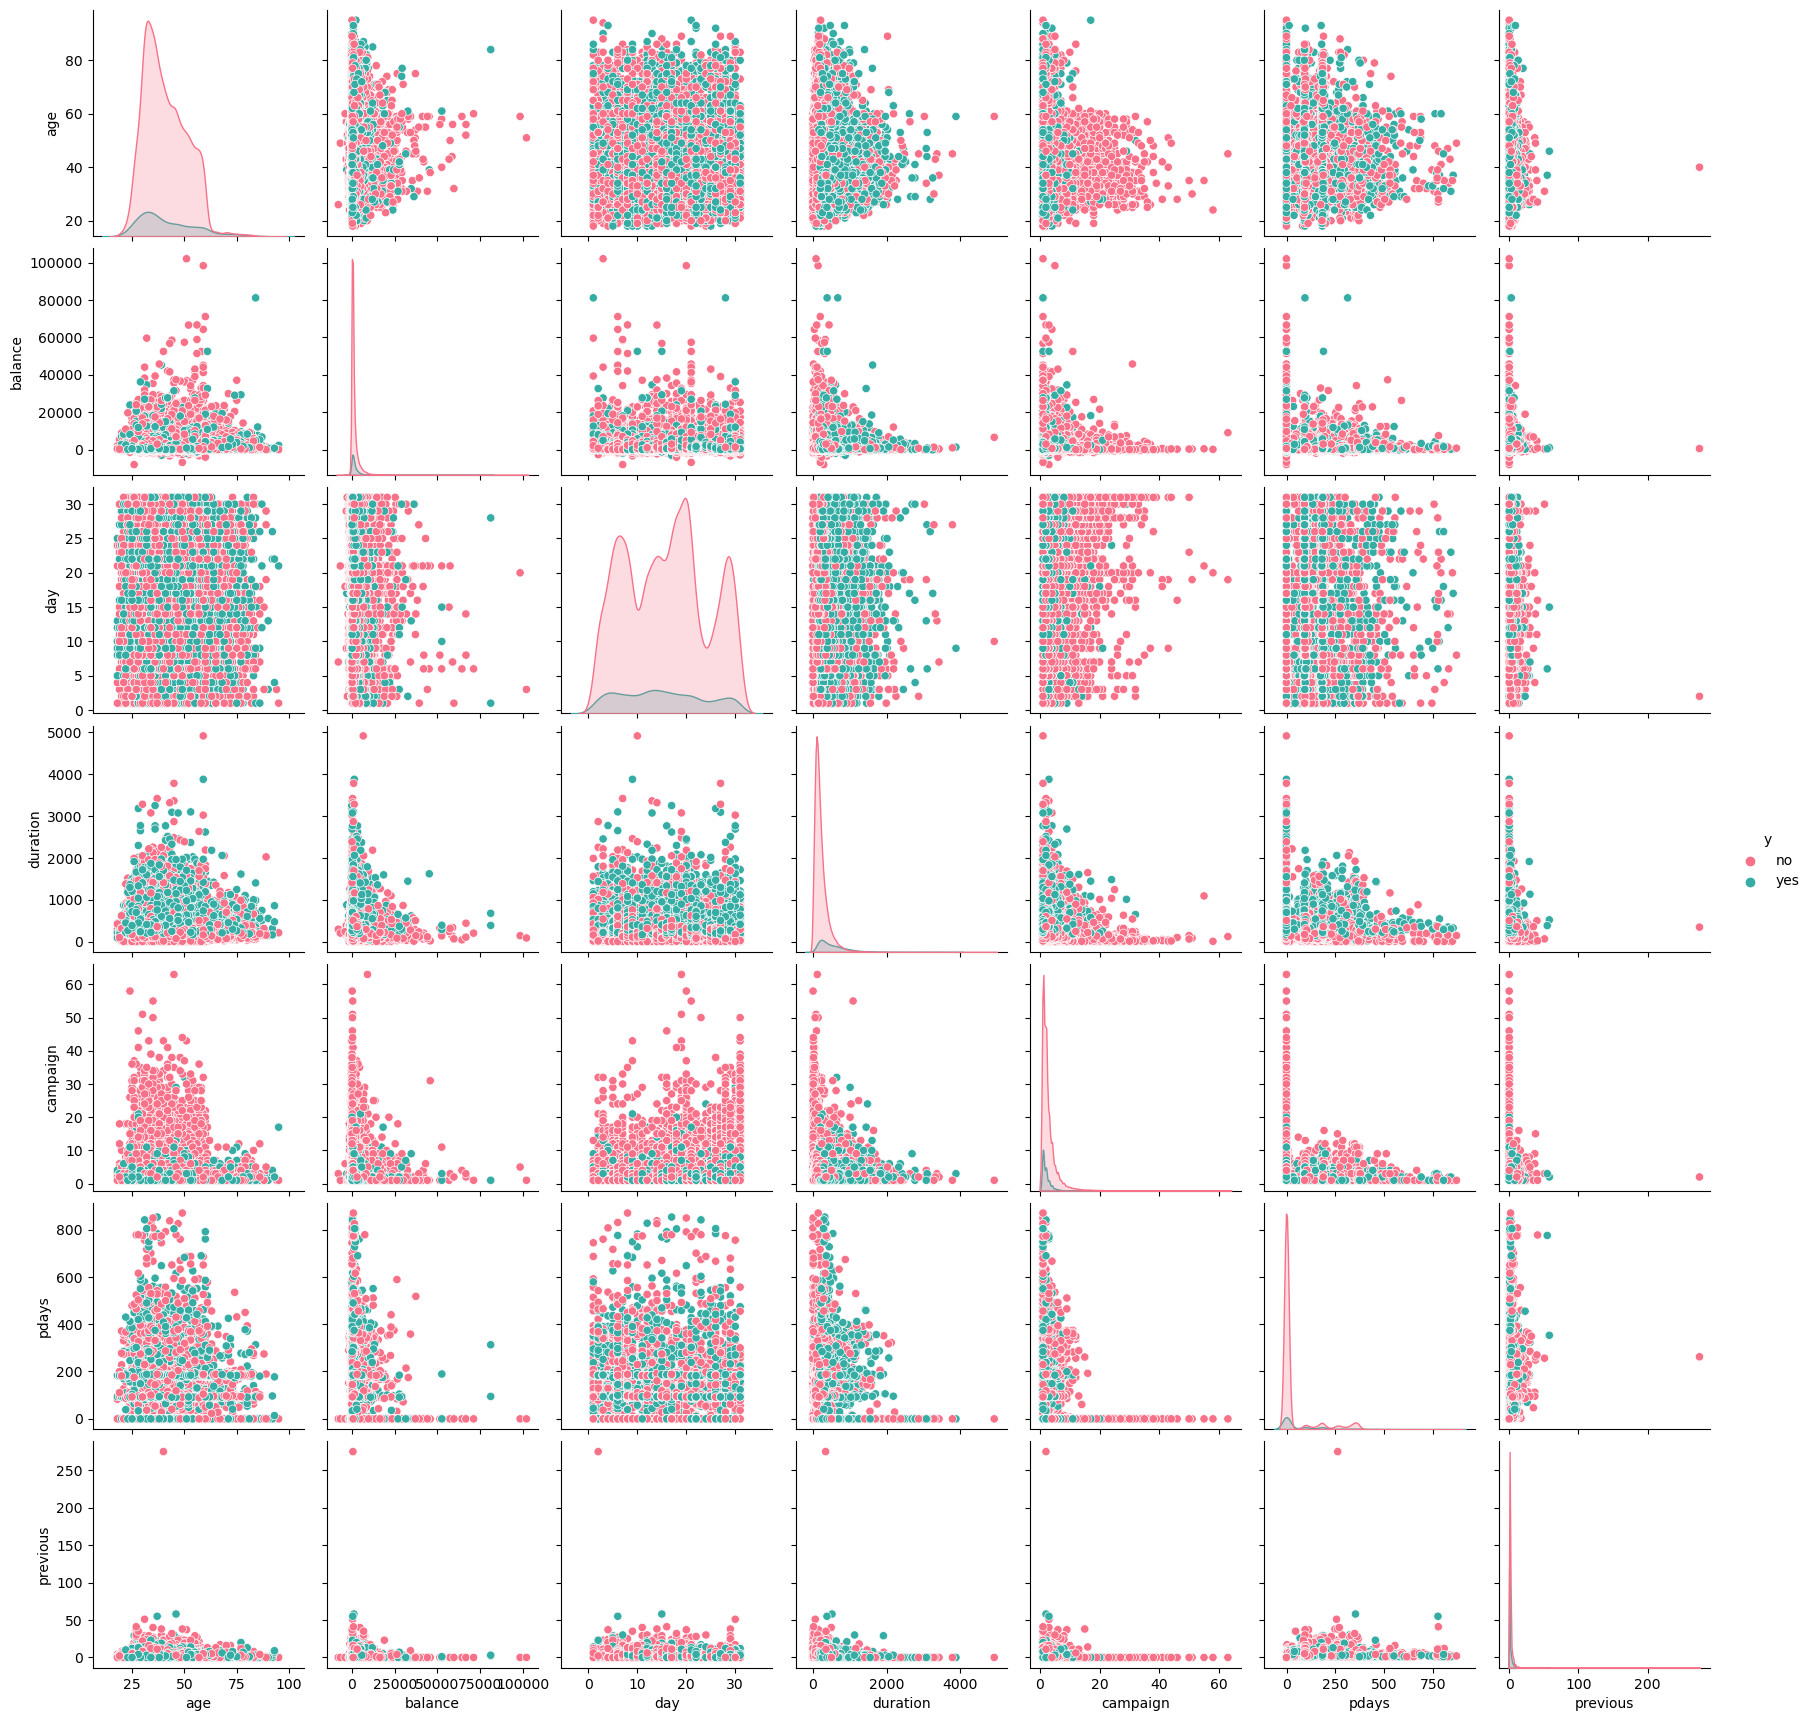

In [117]:
# katılım sağlayanların ve sağlamayanların sayısal değerlerdeki dağılımlarını görselleştirmek için;
sns.pairplot(data=df , hue="y", palette="husl")

In [160]:
# Veri setinde "unknown" olarak girilen değerleri "NaN" yapıyoruz.
for col in ["job", "marital", "education", "default", "housing", "loan", "contact", "month", "poutcome"]:
    data[col].replace('unknown', np.nan, inplace=True)

In [161]:
# Değişkenlerin örnek sayısına oranla ne kadar NaN içerdiğine bakmak için bir for döngüsü kullanıyoruz.

for column in data.columns:  
        sum_nun_ratio =data[column].isna().sum() / 45211
        print(f"Toplam NaN  - {column}: {sum_nun_ratio}")

Toplam NaN  - age: 0.0
Toplam NaN  - job: 0.006370131162770122
Toplam NaN  - marital: 0.0
Toplam NaN  - education: 0.04107407489327818
Toplam NaN  - default: 0.0
Toplam NaN  - balance: 0.0
Toplam NaN  - housing: 0.0
Toplam NaN  - loan: 0.0
Toplam NaN  - contact: 0.28798301298356593
Toplam NaN  - day: 0.0
Toplam NaN  - month: 0.0
Toplam NaN  - duration: 0.0
Toplam NaN  - campaign: 0.0
Toplam NaN  - pdays: 0.0
Toplam NaN  - previous: 0.0
Toplam NaN  - poutcome: 0.8174780473778506
Toplam NaN  - y: 0.0


Verinin ilk durumunda "unknown" olarak girilen değerleri "NaN" haline dönüştürdük. Dönüşüm sonrası "poutcome" değişkenin % 82 "NaN" barındırdığı görülmektedir.

Bu durumun bir sorun teşkil etmeyeceğini veri setinde değişiklikler yapıp bazı karşılaştırmalarla ortaya koymaya çalışacağız.

Oluşturulacak ve Kullanılacak Veri Setler :
- Veriler üzerinde bir değişiklik yapılmayan veri seti. (df1)
- Eksik değer barındıran örneklerin veriden çıkarılmış olarak kullnadığımız veri seti. (df2) 
- "poutcome" değişkeninin bilinmeyenlerini tahmin ederek oluşturduğumuz veri seti. (df3)
- Eksik veri olan değerlerin yarısının veriden çıkarılmış hali. (df4)

### df1 : unknown değerler ile ilgili bir değişiklik yapılmamış veri set.

In [162]:
df1 = df.copy()
df1['y'] = df1['y'].replace({'yes': 1, 'no': 0})

In [163]:
# kategorik değişkenleri kukla değerler atıyoruz.
df1 = pd.get_dummies(df1, columns=["job", "marital", "education", "default", "housing", "loan", "contact", "month","poutcome"])

In [164]:
df1.head(1)

,age,balance,day,duration,campaign,pdays,previous,y,job_admin.,job_blue-collar,...,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,58,2143,5,261,1,-1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1


### df2 :  "unknown" içeren tüm satırların veriden çıkarılmış hali.

In [165]:
df2 = df.copy()
# hedef değişkenin değerlerini 
df2['y'] = df2['y'].replace({'yes': 1, 'no': 0})

In [166]:
# unknown olan değerleri NaN formuna çeviriyoruz.
for col in ["job", "marital", "education", "default", "housing", "loan", "contact", "month","poutcome"]:
    df2[col].replace('unknown', np.nan, inplace=True)

In [167]:
# NaN içeren örnekleri veriden çıkarıyoruz.
df2 = df2.dropna()

In [168]:
# kategorik değişkenleri kukla değerler atıyoruz.
df2 = pd.get_dummies(df2, columns=["job", "marital", "education", "default", "housing", "loan", "contact", "month","poutcome"])

In [169]:
df2.head(1) 

,age,balance,day,duration,campaign,pdays,previous,y,job_admin.,job_blue-collar,...,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success
24060,33,882,21,39,1,151,3,0,1,0,...,0,0,0,0,0,1,0,1,0,0


### df3 : Makine öğrenmesi ile poutcome değerlerinin tahmin edilmiş olduğu veri.

In [170]:
df3 = df.copy()
df3['y'] = df3['y'].replace({'yes': 1, 'no': 0})

In [171]:
# poutcome değerleri dışında unknown içeren değerleri NaN formuna çeviriyoruz.
for col in ["job", "marital", "education", "default", "housing", "loan", "contact", "month",]:
    df3[col].replace('unknown', np.nan, inplace=True)

In [172]:
df3 = df3.dropna()

In [173]:
# kategorik değişkenleri kukla değerler atıyoruz.
df3 = pd.get_dummies(df3, columns=["job", "marital", "education", "default", "housing", "loan", "contact", "month"])

In [174]:
# poutcome değişkenindeki unknown değerleri RandomForestClassifier ile tahmin ediyoruz ve yeni veri seti oluşturuyoruz.
target_variable = 'poutcome'

Xz = df3.drop(columns=[target_variable,"y"])
yz = df3[target_variable]

X_train = Xz[yz != 'unknown']
y_train = yz[yz != 'unknown']

model = RandomForestClassifier()
model.fit(X_train, y_train)

X_unknown = Xz[yz == 'unknown']
y_pred_unknown = model.predict(X_unknown)

df3.loc[yz == 'unknown', target_variable] = y_pred_unknown

In [175]:
df3 = pd.get_dummies(df3, columns=["poutcome"])

In [176]:
df3.head(5)

,age,balance,day,duration,campaign,pdays,previous,y,job_admin.,job_blue-collar,...,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success
12657,27,35,4,255,1,-1,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0
12658,54,466,4,297,1,-1,0,0,0,1,...,1,0,0,0,0,0,0,0,0,1
12659,43,105,4,668,2,-1,0,0,0,1,...,1,0,0,0,0,0,0,1,0,0
12660,31,19,4,65,2,-1,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0
12661,27,126,4,436,4,-1,0,0,0,0,...,1,0,0,0,0,0,0,1,0,0


### df4 : NaN olan potcome değerlerinin yarsının veriden çıkarıldığı veri seti.

In [177]:
df4 = df.copy()
df4['y'] = df4['y'].replace({'yes': 1, 'no': 0})
unknown_filtre = (df4['poutcome'] == 'unknown')
unknown_indeksler = df4[unknown_filtre].index

In [178]:
kaldırılacaklar = int(len(unknown_indeksler)* 0.2)

In [179]:
kaldırılacak_indeksler = unknown_indeksler[:kaldırılacaklar]

In [180]:
df4 = df4.drop(kaldırılacak_indeksler)

In [181]:
# kategorik değişkenleri kukla değerler atıyoruz.
df4 = pd.get_dummies(df4, columns=["job", "marital", "education", "default", "housing", "loan", "contact", "month","poutcome"])

In [182]:
df4.head()

,age,balance,day,duration,campaign,pdays,previous,y,job_admin.,job_blue-collar,...,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
7391,38,1131,29,102,3,-1,0,0,0,1,...,0,0,1,0,0,0,0,0,0,1
7392,35,1550,29,1611,2,-1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
7393,45,1929,29,44,15,-1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
7394,41,9767,29,162,2,-1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
7395,52,963,29,74,2,-1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1


###  RandomForestClassifier
4 farklı veri seti için:
- accuracy skorları.
- cross value skorları.
- recall skorları.
- f1 skorları.
- confusion matrisleri.
- Değişkenlerin önemlilikleri.

In [183]:
veri_setleri = [df1,df2,df3,df4]

Model df1 Doğruluk: 0.9040106163373636
Model df1 Katman skoru: [0.88333518 0.74463614 0.73180712 0.49137359 0.24021234]
Model df1 Duyarlılık: 0.41995073891625617
Model df1 F1 Skoru: 0.5116279069767441
Model df1 confusion matrix: [[5790  180]
 [ 471  341]]
katılım sağlayacak tahminin yanlışlık oranları  = 0.5278592375366569


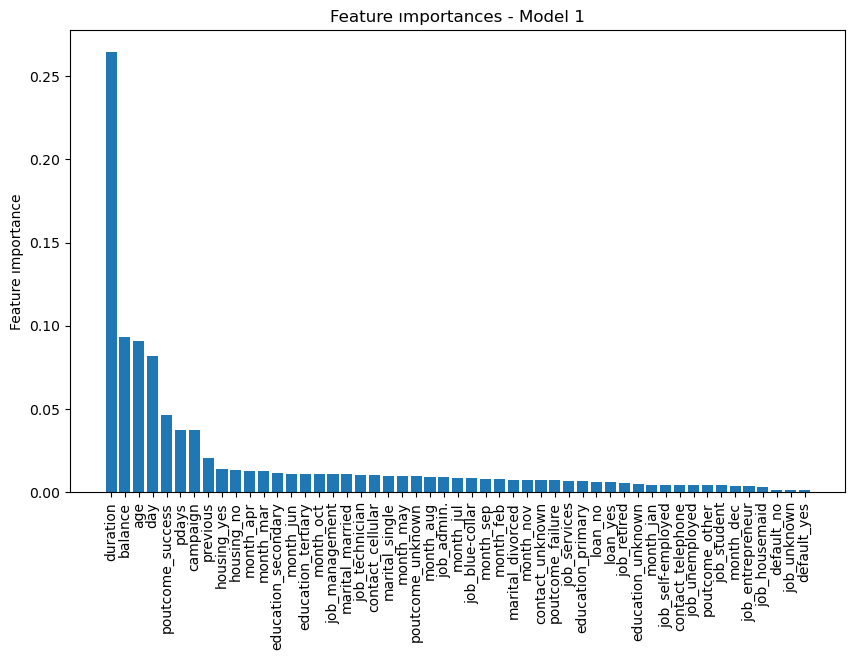

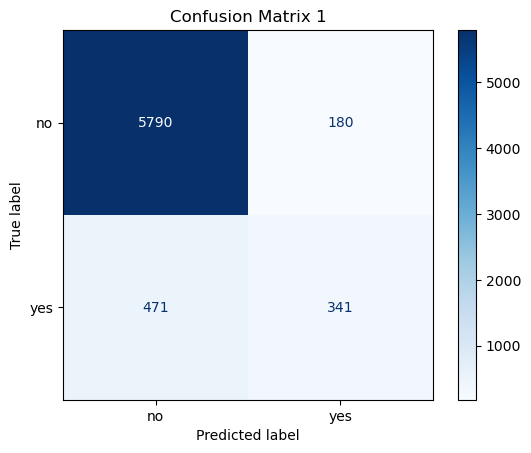

Model df2 Doğruluk: 0.8606627017841971
Model df2 Katman skoru: [0.73550032 0.70936902 0.74744898 0.79209184 0.40752551]
Model df2 Duyarlılık: 0.5756457564575646
Model df2 F1 Skoru: 0.6554621848739496
Model df2 confusion matrix: [[857  49]
 [115 156]]
katılım sağlayacak tahminin yanlışlık oranları  = 0.3141025641025641


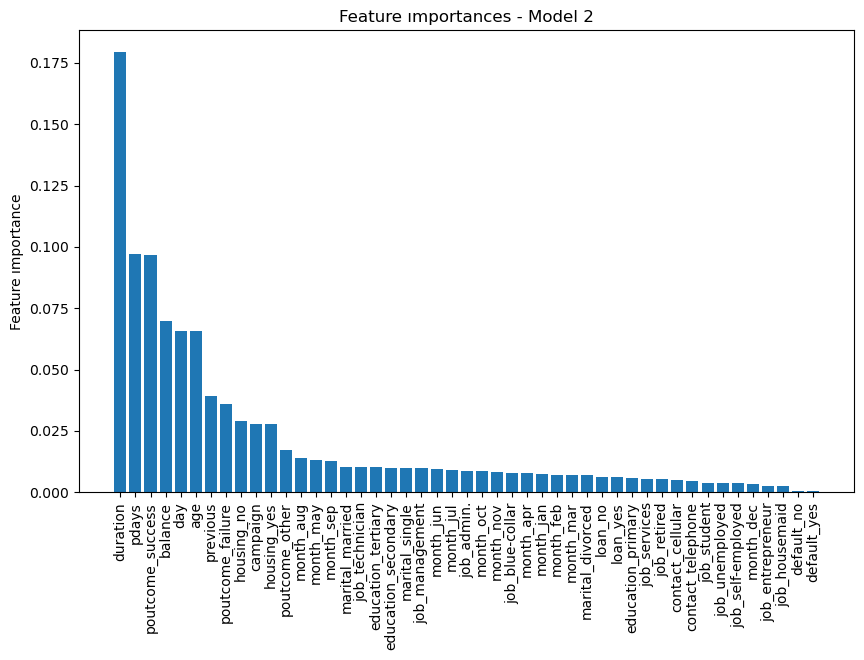

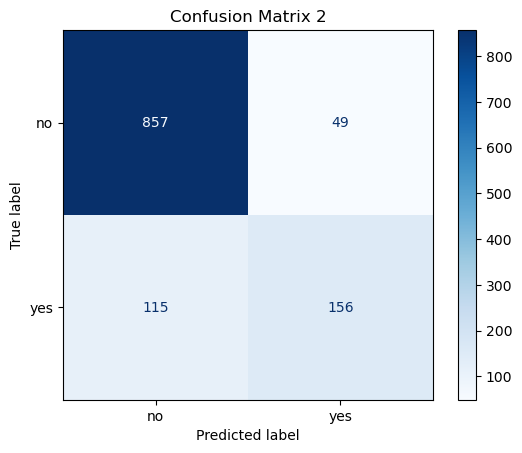

Model df3 Doğruluk: 0.8859176191503128
Model df3 Katman skoru: [0.84098997 0.65884827 0.68791458 0.47775441 0.62578871]
Model df3 Duyarlılık: 0.42921013412816694
Model df3 F1 Skoru: 0.5212669683257919
Model df3 confusion matrix: [[3820  146]
 [ 383  288]]
katılım sağlayacak tahminin yanlışlık oranları  = 0.5069444444444444


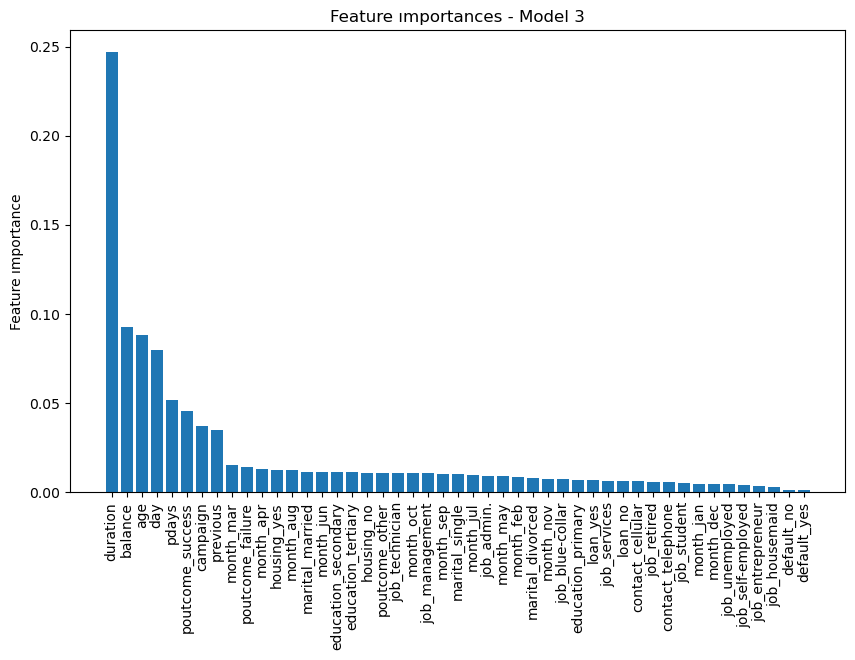

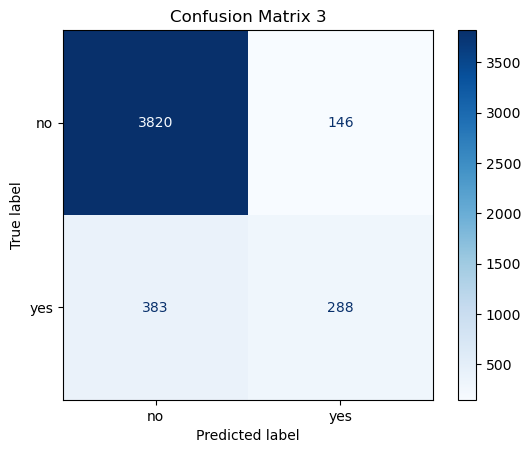

Model df4 Doğruluk: 0.8914154768200246
Model df4 Katman skoru: [0.82945531 0.7423321  0.61263882 0.38789001 0.59307245]
Model df4 Duyarlılık: 0.4109947643979058
Model df4 F1 Skoru: 0.504823151125402
Model df4 confusion matrix: [[4743  166]
 [ 450  314]]
katılım sağlayacak tahminin yanlışlık oranları  = 0.5286624203821656


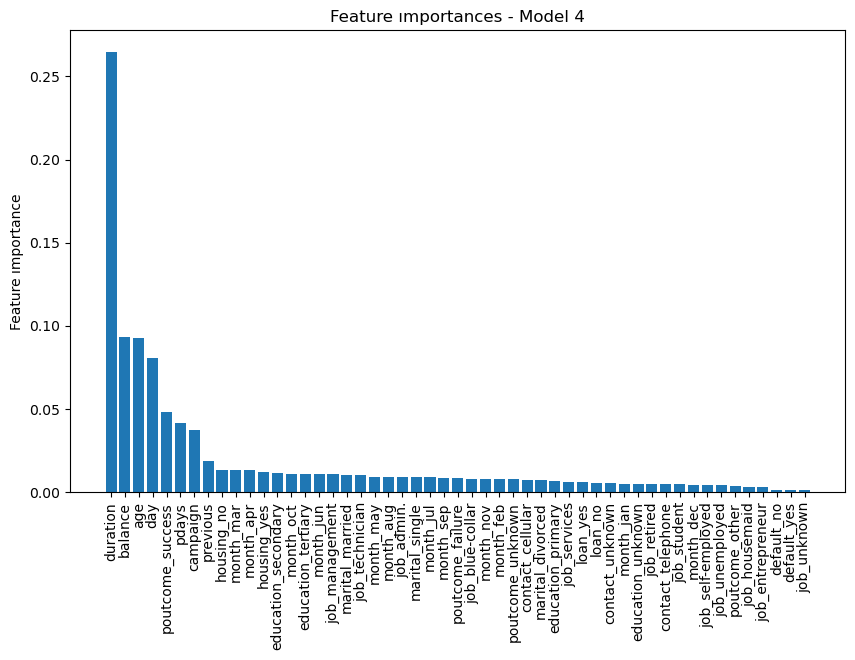

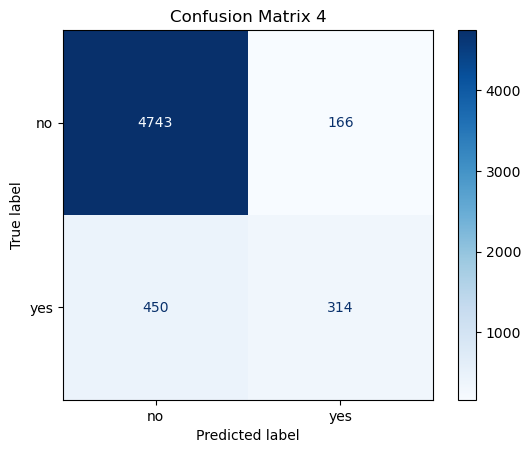

In [184]:
for i, veri_seti in enumerate(veri_setleri,start=1):
    Xr = veri_seti.drop("y",axis=1)
    yr = veri_seti["y"]

    X_train, X_test, y_train, y_test = train_test_split(Xr,yr,test_size=0.15,random_state=42)

    rf_model = RandomForestClassifier(n_estimators=100,random_state=42)
    
    rf_model.fit(X_train, y_train)
# model ile ilgili skorlar ve değerler.    
    y_pred = rf_model.predict(X_test)
    scores = cross_val_score(rf_model, Xr, yr, cv=5) 
    accuracy = accuracy_score(y_test, y_pred) 
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test,y_pred)
    cm = confusion_matrix(y_test,y_pred)
    
    konum = (0, 1)
    konum = cm[konum]
    konum1 = (1, 1)
    konum1 = cm[konum1]
    bolum = konum / konum1
    
    print(f"Model df{i} Doğruluk: {accuracy}")
    print(f"Model df{i} Katman skoru: {scores}")
    print(f"Model df{i} Duyarlılık: {recall}")
    print(f"Model df{i} F1 Skoru: {f1}")
    print(f"Model df{i} confusion matrix: {cm}")
    
    print(f"katılım sağlayacak tahminin yanlışlık oranları  = {bolum}")
    
    feature_importances = rf_model.feature_importances_
    feature_names = Xr.columns
    sorted_idx = feature_importances.argsort()
# değişkenleerin önemlilik derecelerinin görselleştirmesi.    
    plt.figure(figsize=(10,6))
    sorted_idx = sorted_idx[::-1]
    plt.bar(range(len(sorted_idx)),feature_importances[sorted_idx])
    plt.xticks(range(len(sorted_idx)),feature_names[sorted_idx],rotation=90)
    plt.ylabel('Feature ımportance')
    plt.title(f'Feature ımportances - Model {i}')
    plt.show()

# confusion matrix görselleştirmesi.
    disp = ConfusionMatrixDisplay( confusion_matrix=cm, display_labels=['no', 'yes'])
    disp.plot(cmap='Blues', values_format='.4g', ax=None)
    plt.title(f"Confusion Matrix {i}")
    plt.show()

Elde edilen sonuçlara göre df2 veri setinin skorlarının diğer veri setlerine görece daha iyi bir sonuç verdiği görülmektedir.


Katılım sağlamamış olanları en düşük hata ile df2 veri setinde tahmin edilmiş görmekteyiz.

Model df1 Doğruluk: 0.8747097202255889
Model df1 Katman skoru: [0.80493199 0.61170095 0.70327361 0.51758461 0.29440389]
Model df1 Duyarlılık: 0.42071494042163154
Model df1 F1 Skoru: 0.4475865431496831
Model df1 confusion matrix: [[7451  501]
 [ 632  459]]
katılım sağlayacak tahminin yanlışlık oranları  = 1.091503267973856


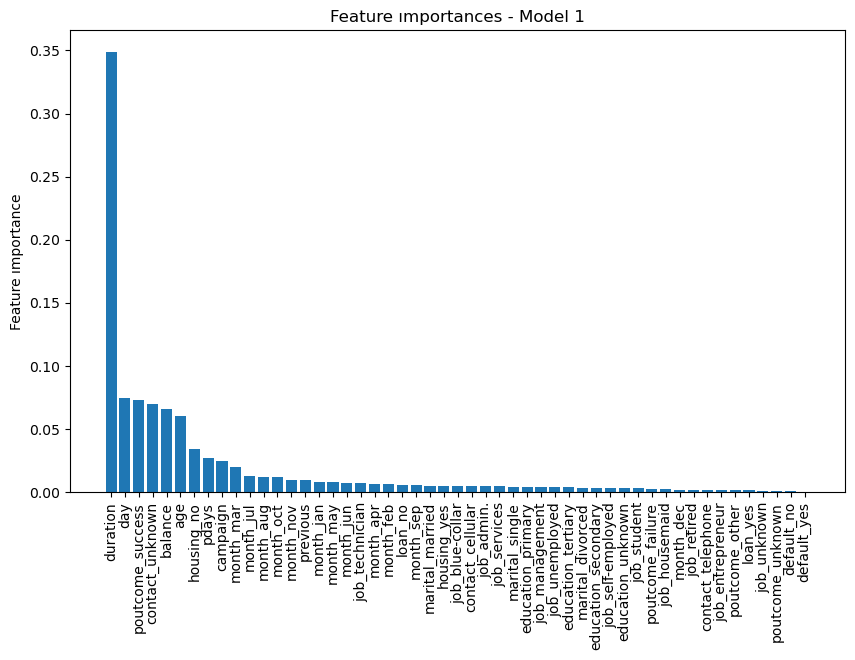

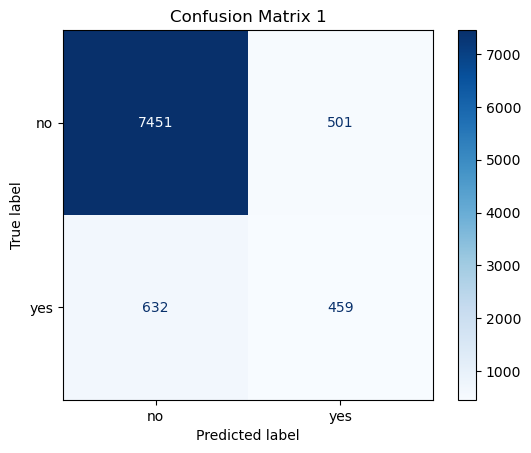

Model df2 Doğruluk: 0.7992351816443595
Model df2 Katman skoru: [0.63798598 0.63479924 0.72257653 0.75127551 0.45982143]
Model df2 Duyarlılık: 0.5828729281767956
Model df2 F1 Skoru: 0.5725915875169606
Model df2 confusion matrix: [[1043  164]
 [ 151  211]]
katılım sağlayacak tahminin yanlışlık oranları  = 0.7772511848341233


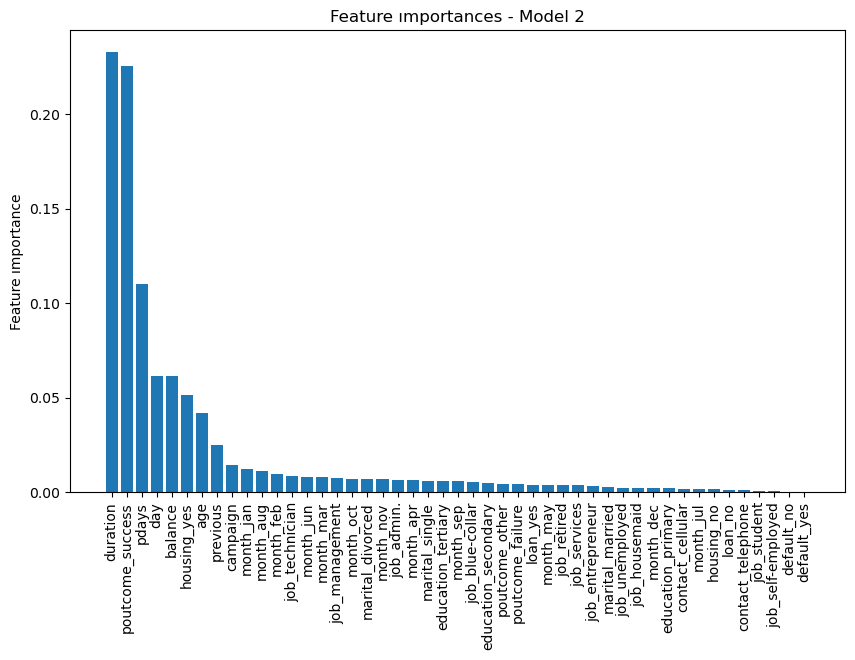

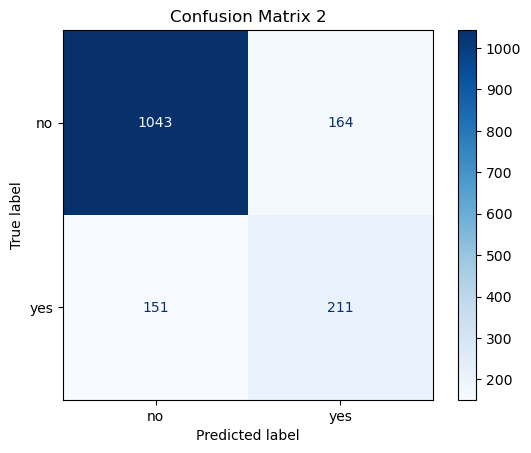

In [159]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import ConfusionMatrixDisplay
veri_setii = [df1, df2]
for i, veri_setii in enumerate(veri_setii, start=1):
    Xd = veri_setii.drop("y", axis=1)
    yd = veri_setii["y"]

    X_train, X_test, y_train, y_test = train_test_split(Xd, yd, test_size=0.20, random_state=42)

    dt_model = DecisionTreeClassifier(random_state=42,class_weight='balanced')

    dt_model.fit(X_train, y_train)

    y_pred = dt_model.predict(X_test)
    scores = cross_val_score(dt_model, Xd, yd, cv=5)
    accuracy = accuracy_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred)
    
    konum = (0, 1)
    konum = cm[konum]
    konum1 = (1, 1)
    konum1 = cm[konum1]
    bolum = konum / konum1

    print(f"Model df{i} Doğruluk: {accuracy}")
    print(f"Model df{i} Katman skoru: {scores}")
    print(f"Model df{i} Duyarlılık: {recall}")
    print(f"Model df{i} F1 Skoru: {f1}")
    print(f"Model df{i} confusion matrix: {cm}")
    
    print(f"katılım sağlayacak tahminin yanlışlık oranları  = {bolum}")

    feature_importances = dt_model.feature_importances_
    feature_names = Xd.columns
    sorted_idx = feature_importances.argsort()

    plt.figure(figsize=(10, 6))
    sorted_idx = sorted_idx[::-1]
    plt.bar(range(len(sorted_idx)), feature_importances[sorted_idx])
    plt.xticks(range(len(sorted_idx)), feature_names[sorted_idx], rotation=90)
    plt.ylabel('Feature ımportance')
    plt.title(f'Feature ımportances - Model {i}')
    plt.show()

    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['no', 'yes'])
    disp.plot(cmap='Blues', values_format='.4g', ax=None)
    plt.title(f"Confusion Matrix {i}")
    plt.show()

In [152]:
Xc = df2.drop("y", axis=1)
yc = df2["y"]

X_train, X_test, y_train, y_test = train_test_split(Xc, yc, test_size=0.15, random_state=42)
model_xgb = XGBClassifier(objective='binary:logistic')
model_xgb.fit(X_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [153]:
model_xgb.score(X_test,y_test)

0.8564146134239592

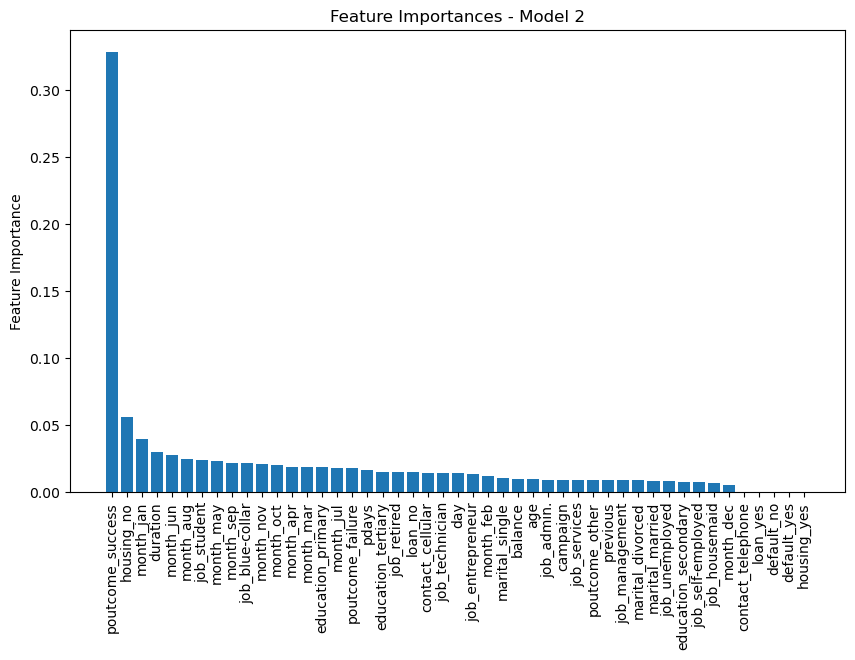

In [154]:
feature_importances = model_xgb.feature_importances_
feature_names = Xc.columns
sorted_idx = feature_importances.argsort()

plt.figure(figsize=(10, 6))
sorted_idx = sorted_idx[::-1]
plt.bar(range(len(sorted_idx)), feature_importances[sorted_idx])
plt.xticks(range(len(sorted_idx)), feature_names[sorted_idx], rotation=90)
plt.ylabel('Feature Importance')
plt.title(f'Feature Importances - Model {i}')
plt.show()

In [155]:
cmc = confusion_matrix(y_test,model_xgb.predict(X_test))
cmc

array([[833,  73],
       [ 96, 175]])

In [157]:
konum = (0, 1)
konum = cmc[konum]
konum1 = (1, 1)
konum1 = cmc[konum1]
bolum = konum / konum1

print(f" katılım sağlayacak tahminin yanlışlık oranları  = {bolum}")

 katılım sağlayacak tahminin yanlışlık oranları  = 0.41714285714285715


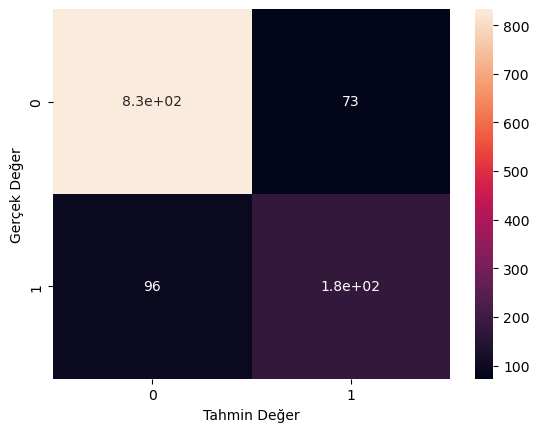

In [156]:
sns.heatmap(cmc, annot=True)
plt.xlabel('Tahmin Değer')
plt.ylabel('Gerçek Değer')
plt.show()